In [1]:
# 사용할 패키지를 import합니다
import sys
print('python', sys.version)

import numpy as np
import pandas as pd
import matplotlib as mpl

import glob
import pickle
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic") # window
plt.rc("axes", unicode_minus=False) # x,y축 (-)부호 표시

import seaborn as sns
from scipy.stats import hypergeom

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


python 3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]


# each

In [3]:
def display_col_barplot(nsig_df, ax):
    
    nsig_sr=nsig_df['num_of_sig']
    
    ## plot bar
    nsig_sr.plot.bar(ax=ax, color='lightcoral', width=0.9, rot=0, edgecolor='k')
    
    for x, val in enumerate(nsig_sr):
        _=ax.text(x, val, val, ha='center', va='bottom', fontsize=20)
        
    
    ## ticklabels & labels
    _=ax.tick_params(axis='both', labelsize=18)
    _=ax.set_xlabel('empirical p-value', fontsize=20)
    _=ax.set_ylabel('N. of MGs', fontsize=20)
    _=ax.set_ylim(0,400)
    ## title
    _=ax.set_title('BRCA', fontsize=23)
    
def display_col_barplot2(nsig_df, ax, col_name):
    
    nsig_sr=nsig_df[col_name]
    
    ## plot bar
    nsig_sr.plot.bar(ax=ax, color='steelblue', width=0.9, rot=0, edgecolor='k')
    
    ## ticklabels & labels
    _=ax.tick_params(axis='both', labelsize=18)
    _=ax.set_xlabel('empirical p-value', fontsize=20)
    _=ax.set_ylabel('-log10(p_value)', fontsize=20)
    
    ## title
    _=ax.set_title(col_name, fontsize=23)
        
def get_hyper_pval(all_gene, gs_gene, sig_gene):
    gs_gene=list(set(all_gene)&set(gs_gene))
    hit_gene=list(set(gs_gene)&set(sig_gene))
    pval = hypergeom.sf(len(hit_gene)-1, len(all_gene), len(gs_gene), len(sig_gene))
    return -np.log10(pval)

def get_ent2sym():
    ent2sym=pd.read_table('../n_stage_pred_BRCA_0804toPC/data/Sym2Entrez.txt').dropna()
    ent2sym['NCBI Gene ID(supplied by NCBI)']=ent2sym['NCBI Gene ID(supplied by NCBI)'].astype(int)
    ent2sym=ent2sym.set_index('NCBI Gene ID(supplied by NCBI)')['Approved symbol']
    return ent2sym

In [4]:
all_gene = list(pickle.load(open("../n_stage_pred_BRCA_0804toPC/mid_result/xgb_result/BRCA_ori0.pickle", 'rb')))

all_nsig_df=pickle.load(open("../n_stage_pred_BRCA_0804toPC/main_result/BRCA_sig_info.pickle", 'rb'))
all_nsig_df

## CM glod standard
CM_gs=list(pd.read_table('../n_stage_pred_BRCA_0804toPC/data/_eval/CM_gene_list.txt')['GeneSymbol'])
all_nsig_df['hyper_pval_CM']=[get_hyper_pval(all_gene, CM_gs, sig_gene) for sig_gene in all_nsig_df['sig_genes']]

## HCMDB glod standard
HCMDB_gs=list(pd.read_table('../n_stage_pred_BRCA_0804toPC/data/_eval/HCMDB_gene_list.txt')['gene'])
all_nsig_df['hyper_pval_HCMDB']=[get_hyper_pval(all_gene, HCMDB_gs, sig_gene) for sig_gene in all_nsig_df['sig_genes']]

## TMMG glod standard
TMMG_gs=pd.read_table('../n_stage_pred_BRCA_0804toPC/data/_eval/TMMG_gene_list.txt')['gene']
ent2sym=get_ent2sym()
TMMG_gs=list(TMMG_gs.map(ent2sym).dropna())
all_nsig_df['hyper_pval_TMMG']=[get_hyper_pval(all_gene, TMMG_gs, sig_gene) for sig_gene in all_nsig_df['sig_genes']]

all_nsig_df

,num_of_sig,sig_genes
0.001,54,"[BTBD8, PTGS2, SH3BGRL, GSTM5, TMPRSS5, KRT4, ..."
0.005,202,"[EGLN2, GRB7, ELAVL1, CLDN4, KCNJ3, CCDC93, WN..."
0.010,357,"[UNC93B1, PLGLB2, GRB7, WNT7A, TSKS, CCDC60, T..."


,num_of_sig,sig_genes,hyper_pval_CM,hyper_pval_HCMDB,hyper_pval_TMMG
0.001,54,"[BTBD8, PTGS2, SH3BGRL, GSTM5, TMPRSS5, KRT4, ...",1.136226,0.555226,1.353245
0.005,202,"[EGLN2, GRB7, ELAVL1, CLDN4, KCNJ3, CCDC93, WN...",2.713462,2.076763,2.656228
0.010,357,"[UNC93B1, PLGLB2, GRB7, WNT7A, TSKS, CCDC60, T...",1.914530,1.459067,3.411080


# Fig 4

,E.Pval,DB,pval
0,0.001,TMMGdb,1.353245
1,0.005,TMMGdb,2.656228
2,0.010,TMMGdb,3.411080
3,0.001,CMGene,1.136226
4,0.005,CMGene,2.713462
5,0.010,CMGene,1.914530
6,0.001,HCMDB,0.555226
7,0.005,HCMDB,2.076763
8,0.010,HCMDB,1.459067


E.Pval
0.001    1.014899
0.005    2.482151
0.010    2.261559
Name: pval, dtype: float64

<Axes: xlabel='DB', ylabel='pval'>

[0.044335798783355466,
 0.0022068443382345267,
 0.000388079003826747,
 0.07307588252655796,
 0.0019343633329979737,
 0.012175026038464069,
 0.2784670433737956,
 0.008379867552637105,
 0.03474825145177962]

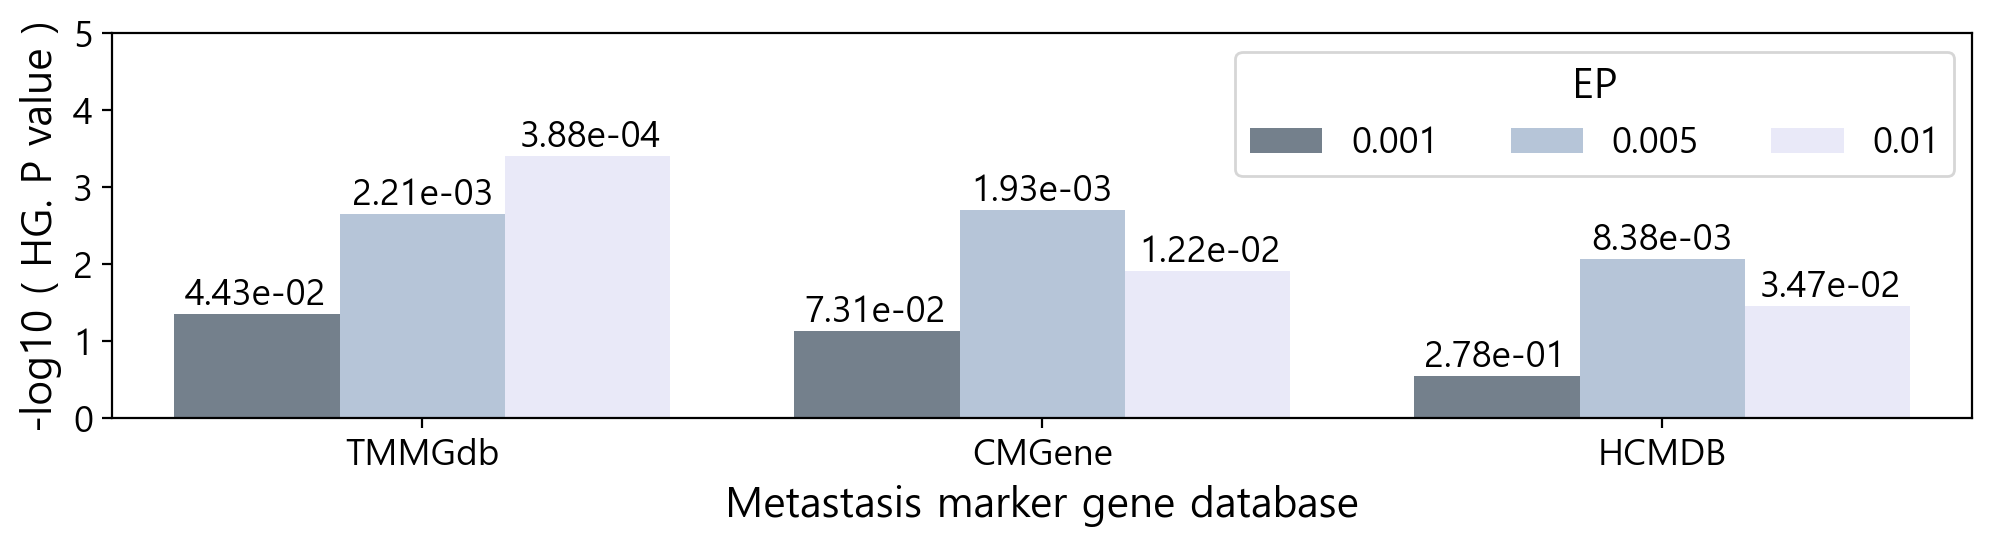

In [6]:
all_nsig_df2=all_nsig_df.reset_index().iloc[:,[0,3,4,5]]
all_nsig_df2.columns=['E.Pval','CMGene','HCMDB','TMMGdb']
all_nsig_df2=all_nsig_df2[['E.Pval','TMMGdb','CMGene','HCMDB']]
all_nsig_df3=all_nsig_df2.melt(id_vars='E.Pval', var_name='DB', value_name='pval')
all_nsig_df3
all_nsig_df3.groupby('E.Pval')['pval'].mean()
fig=plt.figure(figsize=(12,2.5), dpi=200)
ax1=fig.subplots()

sns.barplot(data=all_nsig_df3, x='DB', y='pval', hue='E.Pval', palette={0.001: 'slategrey',
                                                                       0.005: 'lightsteelblue',
                                                                       0.01: 'lavender'}, ax=ax1)

x_list=[-0.27,0,0.27,0.73,1,1.27,1.73,2,2.27]
y_list=list(all_nsig_df3['pval'])
s_list=[10**(-y) for y in y_list]
s_list
for x,y,s in zip(x_list, y_list, s_list):
    _=ax1.text(x,y,'{:.2e}'.format(s), ha='center',va='bottom',fontsize=13)

_=ax1.set_ylabel('-log10 ( HG. P value )', fontsize=15)
_=ax1.set_xlabel('Metastasis marker gene database', fontsize=15)
_=ax1.tick_params(axis='both', labelsize=13)
_=ax1.set_ylim(0,5)
_=ax1.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=13,
            title='EP', title_fontsize=15, ncol=3)